In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MaxNLocator

# Create DataFrame from the data
delta_values = [1, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
proc_counts = [1, 2, 4, 8, 16, 32, 64]

data = [
    [4.503, 3.515, 3.100, 3.026, 2.939, 3.467, 8.079],
    [4.536, 3.523, 3.091, 2.825, 2.947, 3.399, 8.108],
    [4.530, 3.631, 3.090, 2.908, 3.053, 3.412, 7.903],
    [4.507, 3.536, 3.042, 2.892, 2.990, 3.421, 8.117],
    [4.493, 3.619, 3.121, 2.942, 2.983, 3.434, 7.930],
    [4.500, 3.525, 3.120, 2.938, 2.973, 3.490, 8.353],
    [4.504, 3.538, 3.186, 2.965, 3.000, 3.420, 7.992],
    [4.507, 3.516, 3.185, 2.928, 2.916, 3.583, 8.651],
    [4.498, 3.455, 3.096, 2.877, 2.971, 3.563, 8.428],
    [4.536, 3.459, 3.064, 3.042, 2.922, 4.855, 8.156],
    [4.505, 3.440, 3.259, 3.032, 2.945, 3.570, 8.059],
    [4.511, 3.543, 3.148, 2.955, 2.964, 3.376, 8.425]
]

# Create a DataFrame
df = pd.DataFrame(data, index=delta_values, columns=proc_counts)
df.index.name = 'Delta'
df.columns.name = 'Processors'

# Convert to long format for easier plotting with seaborn
df_long = df.reset_index().melt(id_vars=['Delta'], 
                                var_name='Processors', 
                                value_name='Execution Time (s)')

# Set plot style
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 8)

# Visualization 1: Execution time vs. Processor count for different delta values
plt.figure(figsize=(14, 8))
sns.lineplot(data=df_long, x='Processors', y='Execution Time (s)', 
            hue='Delta', palette='viridis', marker='o')
plt.xscale('log', base=2)  # Log scale for processors
plt.xticks(proc_counts, labels=proc_counts)
plt.title('Execution Time vs. Processor Count')
plt.grid(True, which='both', linestyle='--', alpha=0.6)
plt.legend(title='Delta', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('execution_vs_processors.png', dpi=300)
plt.close()

# Visualization 2: Heatmap of execution times
plt.figure(figsize=(12, 8))
sns.heatmap(df, annot=True, fmt='.3f', cmap='viridis', 
           cbar_kws={'label': 'Execution Time (s)'})
plt.title('Execution Time Heatmap: Delta vs Processor Count')
plt.tight_layout()
plt.savefig('execution_heatmap.png', dpi=300)
plt.close()

# Visualization 3: Distribution of execution times for each processor count
plt.figure(figsize=(14, 8))
sns.boxplot(data=df_long, x='Processors', y='Execution Time (s)')
plt.title('Distribution of Execution Times by Processor Count')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig('execution_boxplot.png', dpi=300)
plt.close()

# Visualization 4: Performance scaling analysis
# Calculate average execution time for each processor count
avg_times = df.mean()
# Calculate speedup relative to 1 processor
speedup = avg_times[1] / avg_times
# Calculate efficiency (speedup / processor count)
efficiency = speedup / df.columns

# Create a DataFrame for scaling metrics
scaling_df = pd.DataFrame({
    'Avg Time': avg_times,
    'Speedup': speedup,
    'Efficiency': efficiency
})

# Plot speedup and ideal speedup
plt.figure(figsize=(12, 8))
plt.plot(scaling_df.index, scaling_df['Speedup'], marker='o', 
         linestyle='-', label='Actual Speedup')
plt.plot(scaling_df.index, scaling_df.index, linestyle='--', 
         label='Ideal Linear Speedup')
plt.title('Speedup vs Processor Count')
plt.xlabel('Number of Processors')
plt.ylabel('Speedup (relative to 1 processor)')
plt.xticks(proc_counts)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig('speedup_analysis.png', dpi=300)
plt.close()

# Visualization 5: Efficiency analysis
plt.figure(figsize=(12, 8))
plt.plot(scaling_df.index, scaling_df['Efficiency'], marker='o', 
         linestyle='-', color='green')
plt.axhline(y=1, linestyle='--', color='red', label='Ideal Efficiency')
plt.title('Parallel Efficiency vs Processor Count')
plt.xlabel('Number of Processors')
plt.ylabel('Efficiency (Speedup/Processor Count)')
plt.xticks(proc_counts)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig('efficiency_analysis.png', dpi=300)
plt.close()

# Visualization 6: Effect of Delta values on different processor counts
# Select a few representative processor counts
selected_procs = [1, 8, 16, 64]
plt.figure(figsize=(14, 8))
for proc in selected_procs:
    plt.plot(df.index, df[proc], marker='o', linestyle='-', 
             label=f'{proc} Processor{"s" if proc > 1 else ""}')
plt.title('Effect of Delta Values on Execution Time')
plt.xlabel('Delta Value')
plt.ylabel('Execution Time (s)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig('delta_effect.png', dpi=300)
plt.close()

# Statistical insights
print("Statistical Summary of Execution Times by Processor Count:")
print(df.describe().round(3))

# Find optimal processor counts for different delta values
optimal_procs = df.idxmin(axis=1)
print("\nOptimal Processor Count for Each Delta Value:")
for delta, proc in optimal_procs.items():
    print(f"Delta {delta}: {proc} processors (Time: {df.loc[delta, proc]:.3f}s)")

# Find average performance improvement between processor counts
avg_improvement = pd.DataFrame()
for i in range(len(proc_counts)-1):
    current = proc_counts[i]
    next_proc = proc_counts[i+1]
    improvement = (df[current] - df[next_proc]) / df[current] * 100
    avg_improvement[f'{current}->{next_proc}'] = improvement

print("\nAverage Performance Improvement Between Processor Counts (%):")
print(avg_improvement.mean().round(2))

# Analyze the performance drop at 64 processors
drop_64 = ((df[32] - df[64]) / df[32] * -100).mean()
print(f"\nAverage Performance Drop at 64 processors compared to 32: {drop_64:.2f}%")

# Performance variability analysis
variability = df.std() / df.mean() * 100
print("\nPerformance Variability (CV%) across Delta Values by Processor Count:")
print(variability.round(2))

Statistical Summary of Execution Times by Processor Count:
Processors      1       2       4       8       16      32      64
count       12.000  12.000  12.000  12.000  12.000  12.000  12.000
mean         4.511   3.525   3.125   2.944   2.967   3.582   8.183
std          0.015   0.058   0.061   0.066   0.038   0.407   0.230
min          4.493   3.440   3.042   2.825   2.916   3.376   7.903
25%          4.502   3.501   3.091   2.904   2.944   3.418   8.042
50%          4.506   3.524   3.110   2.940   2.968   3.450   8.113
75%          4.516   3.539   3.157   2.980   2.985   3.565   8.371
max          4.536   3.631   3.259   3.042   3.053   4.855   8.651

Optimal Processor Count for Each Delta Value:
Delta 1: 16 processors (Time: 2.939s)
Delta 5: 8 processors (Time: 2.825s)
Delta 10: 8 processors (Time: 2.908s)
Delta 20: 8 processors (Time: 2.892s)
Delta 30: 8 processors (Time: 2.942s)
Delta 40: 8 processors (Time: 2.938s)
Delta 50: 8 processors (Time: 2.965s)
Delta 60: 16 processors (T

ValueError: operands could not be broadcast together with shapes (1,4) (7,) 

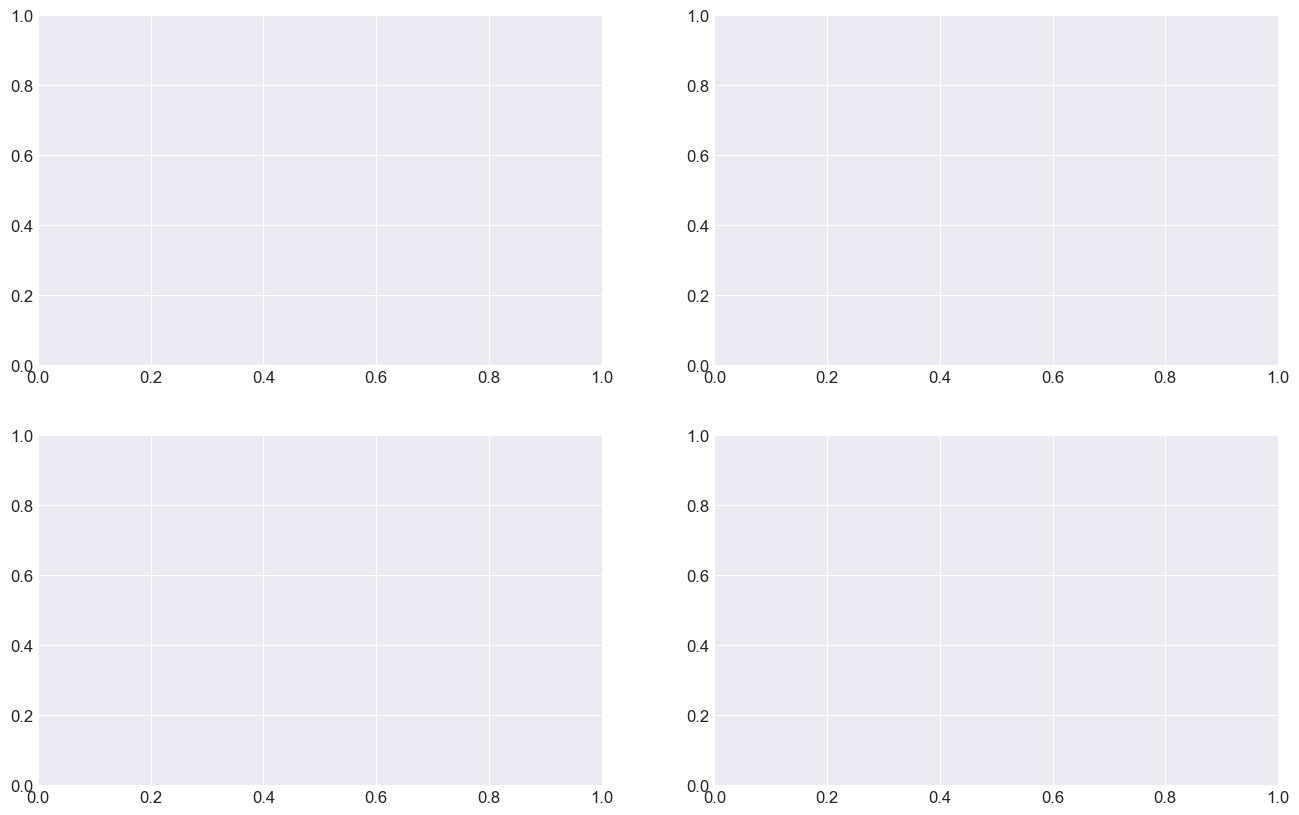

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# Data from your LaTeX table
deltas = [1, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
execution_times = [
    [4.503, 3.515, 3.100, 3.026, 2.939, 3.467, 8.079],  # Delta = 1
    [4.536, 3.523, 3.091, 2.825, 2.947, 3.399, 8.108],  # Delta = 5
    [4.530, 3.631, 3.090, 2.908, 3.053, 3.412, 7.903],  # Delta = 10
    [4.507, 3.536, 3.042, 2.892, 2.990, 3.421, 8.117],  # Delta = 20
    [4.493, 3.619, 3.121, 2.942, 2.983, 3.434, 7.930],  # Delta = 30
    [4.500, 3.525, 3.120, 2.938, 2.973, 3.490, 8.353],  # Delta = 40
    [4.504, 3.538, 3.186, 2.965, 3.000, 3.420, 7.992],  # Delta = 50
    [4.507, 3.516, 3.185, 2.928, 2.916, 3.583, 8.651],  # Delta = 60
    [4.498, 3.455, 3.096, 2.877, 2.971, 3.563, 8.428],  # Delta = 70
    [4.536, 3.459, 3.064, 3.042, 2.922, 4.855, 8.156],  # Delta = 80
    [4.505, 3.440, 3.259, 3.032, 2.945, 3.570, 8.059],  # Delta = 90
    [4.511, 3.543, 3.148, 2.955, 2.964, 3.376, 8.425],  # Delta = 100
]

processors = [1, 2, 4, 8, 16, 32, 64]

# Split indices for processors
first_group = [0, 1, 2, 3]     # 1, 2, 4, 8 processors
second_group = [4, 5, 6]       # 16, 32, 64 processors

# Function to calculate speedup and efficiency
def calculate_speedup_efficiency(exec_times):
    speedup = np.array([exec_times[0] / np.array(exec_times)])
    efficiency = speedup / np.array(processors)
    return speedup[0], efficiency[0]

# Plot function for a group of processors
def plot_group(axs, group, title, show_legend=True):
    markers = ['o', 's', 'D', '^', 'v', 'p', '*', 'X', '<', '>']
    
    for i, delta in enumerate(deltas):
        exec_times = [execution_times[i][j] for j in group]
        
        speedup, efficiency = calculate_speedup_efficiency(exec_times)

        axs[0].plot(np.array(processors)[group], speedup, marker=markers[i % len(markers)], label=f"Δ = {delta}")
        axs[1].plot(np.array(processors)[group], efficiency, marker=markers[i % len(markers)], label=f"Δ = {delta}")
        
    axs[0].set_title(f"{title} (Speedup)")
    axs[0].set_xlabel("Number of Processors")
    axs[0].set_ylabel("Speedup")
    axs[0].grid(True)

    axs[1].set_title(f"{title} (Efficiency)")
    axs[1].set_xlabel("Number of Processors")
    axs[1].set_ylabel("Efficiency")
    axs[1].grid(True)

    # Show legend only if specified
    if show_legend:
        axs[0].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(16, 10))

# Plot first group (1, 2, 4, 8 processors)
plot_group(axs[:, 0], first_group, "Processors: 1, 2, 4, 8")

# Plot second group (16, 32, 64 processors) with legend
plot_group(axs[:, 1], second_group, "Processors: 16, 32, 64", show_legend=True)

plt.tight_layout()
plt.show()


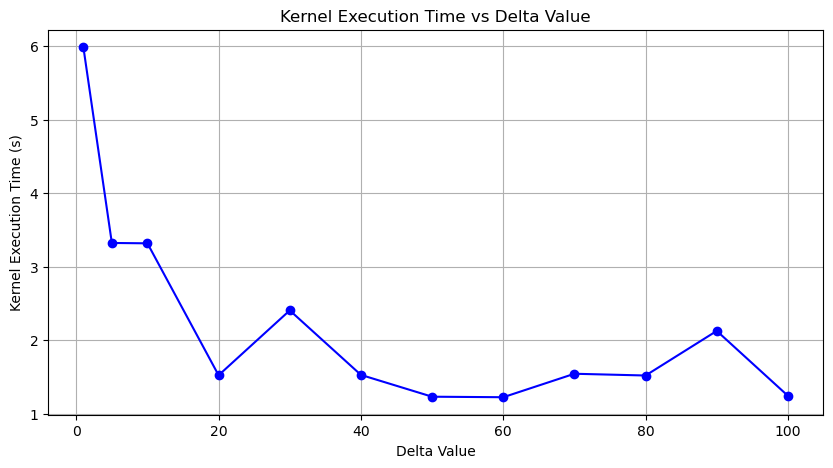

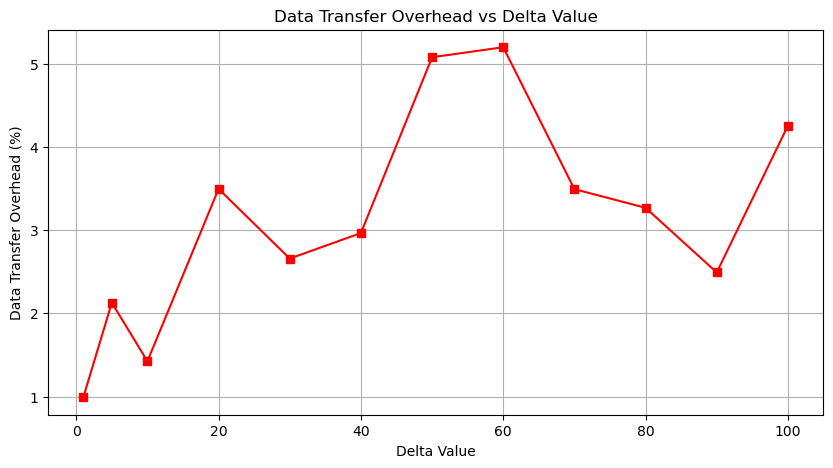

In [1]:
import matplotlib.pyplot as plt

# Delta values
delta_values = [1, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

# Kernel Execution Times (in seconds)
kernel_times = [5.98321, 3.32288, 3.31799, 1.52482, 2.4064, 1.52963, 1.23338, 1.22632, 1.54532, 1.52146, 2.12756, 1.24549]

# Data Transfer Times (in seconds)
data_transfer_times = [0.060524, 0.072946, 0.048393, 0.055767, 0.066357, 0.047203, 0.066625, 0.067906, 0.056468, 0.051899, 0.054913, 0.055913]

# Total Execution Times (in seconds)
total_times = [6.10216, 3.4281, 3.39897, 1.59558, 2.49693, 1.59243, 1.31242, 1.3066, 1.61707, 1.58828, 2.20435, 1.31418]

# Calculate Data Transfer Overhead (%)
data_transfer_overhead = [(dt / tt) * 100 for dt, tt in zip(data_transfer_times, total_times)]

# Plot Kernel Execution Time vs Delta
plt.figure(figsize=(10, 5))
plt.plot(delta_values, kernel_times, marker='o', linestyle='-', color='b')
plt.xlabel('Delta Value')
plt.ylabel('Kernel Execution Time (s)')
plt.title('Kernel Execution Time vs Delta Value')
plt.grid(True)
plt.show()

# Plot Data Transfer Overhead (%) vs Delta
plt.figure(figsize=(10, 5))
plt.plot(delta_values, data_transfer_overhead, marker='s', linestyle='-', color='r')
plt.xlabel('Delta Value')
plt.ylabel('Data Transfer Overhead (%)')
plt.title('Data Transfer Overhead vs Delta Value')
plt.grid(True)
plt.show()
